# CAPSTONE PROJECT – 05

### Problem Scope And Objective:


It is quite evident that in P2P lending industry, there are definitely huge advantages of earning higher rate of interest by the investors, whereas borrower can spend lower amount of interest as compared to the conventional banking system. However, two most critical questions faced by this industry by any other lending industries are-

a) How risky is the borrower &

b) Given the borrowers risks, should we lend him/her or not
As the lending is done via online mode & there is no direct connect between the borrowers & the investor, this industry faces huge risk, which is a risk of default. Therefore, the challenge is to identify which customers, the investors should offer the loan & avoid the risk of defaults.


Two of the most important objectives which we would like to work upon are as below - 

To develop the credit scorecard using a regression model, where the past data of the existing loans & default cases can be used to enable the investor to predict the probability of default for a potential loan to be given to the new loan applications from the borrowers and based on the risk categorization / risk bucketing suggest suitable interest rates to be charged to hedge the risk involved.

Data:
https://www.lendingclub.com/info/download-data.action



In [ ]:
## this dataset contains completed load data for all loans issued through the 2007-2011

In [206]:
import numpy as np
import pandas as pd   # https://www.kaggle.com/wendykan/lending-club-loan-data

In [389]:
loan=pd.read_csv('LoanStats3a.csv',skiprows=1)

In [390]:
loan.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
0,NaN,NaN,5000.0,5000.0,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,2500.0,2500.0,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,2400.0,2400.0,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,10000.0,10000.0,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,3000.0,3000.0,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN


In [391]:
5000/5863.155187

0.8527831586457375

In [392]:
loan.shape

(42538, 144)

## Target column is loan_status

In [393]:
loan['loan_status'].value_counts()

Fully Paid                                             34116
Charged Off                                             5670
Does not meet the credit policy. Status:Fully Paid      1988
Does not meet the credit policy. Status:Charged Off      761
Name: loan_status, dtype: int64

In [394]:
loan['loan_status'].isnull().sum()

3

## Since this is our target column, all the rows which have null values should be dropped

In [395]:
print (loan.shape)
loan = loan.dropna(axis=0, subset=['loan_status'])
print(loan.shape)
loan['loan_status'].isnull().sum()

(42538, 144)
(42535, 144)


0

#### Here we can see 4 categories in loan status. We understand that the word 'Does not meet the credit policy' referring to loans which does not follow the current criteria of te lending club; Loans issued before the policy is changed. So, we will derive 2 categories (Good loan and Bad loan) from 4 categoris.

#### We consider Fully paid and Does not meet the credit policy. Status:Fully Paid as GOOD LOAN, and
#### Charged off and Does not meet the credit policy. Status:Charged Off as BAD LOAN

In [396]:
df=loan

## Derive a new target column loan_condition using existing column loan_status, and drop the column loan_status

In [397]:
def loan_condition(e):
    if e in ['Charged Off','Does not meet the credit policy. Status:Charged Off']:
        return 'Bad Loan'
    elif e in ['Fully Paid','Does not meet the credit policy. Status:Fully Paid']:
        return 'Good Loan'
    
loan['loan_condition'] = loan['loan_status'].apply(loan_condition)
print (loan.shape)
loan=loan.drop(['loan_status'],axis=1)
print(loan.shape)

(42535, 145)
(42535, 144)


In [398]:
loan['loan_condition'].value_counts()  # 34116+1988=36104;  5670+761=6431

Good Loan    36104
Bad Loan      6431
Name: loan_condition, dtype: int64

In [399]:
loan.head(2)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,hardship_payoff_balance_amount,hardship_last_payment_amount,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term,loan_condition
0,NaN,NaN,5000.0,5000.0,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,Good Loan
1,NaN,NaN,2500.0,2500.0,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,Bad Loan


### We noticed that, out of 144 columns, many columns left blank; So, we have to drop those columns which are having more than 90% null values, and rows which has more than 70% null values

## To check those columns which have more than 90% null values

In [400]:
df1=loan
col=[]
nul=[]
for i in df1.columns:
    if (df1[i].isna().sum()/42535)*100 >90:
        nul.append(i)

        
print (nul)
print(len(nul))

['id', 'member_id', 'url', 'mths_since_last_record', 'next_pymnt_d', 'mths_since_last_major_derog', 'annual_inc_joint', 'dti_joint', 'verification_status_joint', 'tot_coll_amt', 'tot_cur_bal', 'open_acc_6m', 'open_act_il', 'open_il_12m', 'open_il_24m', 'mths_since_rcnt_il', 'total_bal_il', 'il_util', 'open_rv_12m', 'open_rv_24m', 'max_bal_bc', 'all_util', 'total_rev_hi_lim', 'inq_fi', 'total_cu_tl', 'inq_last_12m', 'acc_open_past_24mths', 'avg_cur_bal', 'bc_open_to_buy', 'bc_util', 'mo_sin_old_il_acct', 'mo_sin_old_rev_tl_op', 'mo_sin_rcnt_rev_tl_op', 'mo_sin_rcnt_tl', 'mort_acc', 'mths_since_recent_bc', 'mths_since_recent_bc_dlq', 'mths_since_recent_inq', 'mths_since_recent_revol_delinq', 'num_accts_ever_120_pd', 'num_actv_bc_tl', 'num_actv_rev_tl', 'num_bc_sats', 'num_bc_tl', 'num_il_tl', 'num_op_rev_tl', 'num_rev_accts', 'num_rev_tl_bal_gt_0', 'num_sats', 'num_tl_120dpd_2m', 'num_tl_30dpd', 'num_tl_90g_dpd_24m', 'num_tl_op_past_12m', 'pct_tl_nvr_dlq', 'percent_bc_gt_75', 'tot_hi_cre

### There are 90 columns which have more than 90% null values

### We also noticed that, some columns have unique values throught the column. We will drop those columns as well

## To check columns which has same value throught the column

In [401]:
df1=loan
same=[]
for i in df1.columns:
    if len(df1[i].value_counts())>0 and len(df1[i].value_counts())==1:
        same.append(i)
        
print(same)
print (len(same))

['pymnt_plan', 'initial_list_status', 'out_prncp', 'out_prncp_inv', 'collections_12_mths_ex_med', 'policy_code', 'application_type', 'chargeoff_within_12_mths', 'hardship_flag']
9


### To confirm

In [402]:
for i in same:
    print (df1[i].value_counts())

n    42535
Name: pymnt_plan, dtype: int64
f    42535
Name: initial_list_status, dtype: int64
0.0    42535
Name: out_prncp, dtype: int64
0.0    42535
Name: out_prncp_inv, dtype: int64
0.0    42390
Name: collections_12_mths_ex_med, dtype: int64
1.0    42535
Name: policy_code, dtype: int64
Individual    42535
Name: application_type, dtype: int64
0.0    42390
Name: chargeoff_within_12_mths, dtype: int64
N    42535
Name: hardship_flag, dtype: int64


### There are 9 columns, which has same value throught.

## We will drop 90+9=99 columns from the dataset.

In [403]:
to_drop=[]
to_drop1=nul+same
print (len(to_drop1))

99


In [404]:
loan_updated=df1.drop(columns=to_drop1,axis=1)
df2=loan_updated
print (loan_updated.shape)

(42535, 45)


In [405]:
categ=[]
numer=[]
for i in df2.columns:
    if(len(df2[i].unique())<37):
        categ.append(i)
    else:
        numer.append(i)
        
print (len(categ))        
print ('Categorical columns are: \n', categ)

print('')
print('Continuous data are: \n', numer)
print (len(numer)) 

16
Categorical columns are: 
 ['term', 'grade', 'sub_grade', 'emp_length', 'home_ownership', 'verification_status', 'purpose', 'delinq_2yrs', 'inq_last_6mths', 'pub_rec', 'acc_now_delinq', 'delinq_amnt', 'pub_rec_bankruptcies', 'tax_liens', 'debt_settlement_flag', 'loan_condition']

Continuous data are: 
 ['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'int_rate', 'installment', 'emp_title', 'annual_inc', 'issue_d', 'desc', 'title', 'zip_code', 'addr_state', 'dti', 'earliest_cr_line', 'mths_since_last_delinq', 'open_acc', 'revol_bal', 'revol_util', 'total_acc', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries', 'collection_recovery_fee', 'last_pymnt_d', 'last_pymnt_amnt', 'last_credit_pull_d']
29


In [406]:
for i in categ:
    print (i, '\n', df2[i].value_counts())

term 
  36 months    31534
 60 months    11001
Name: term, dtype: int64
grade 
 B    12389
A    10183
C     8740
D     6016
E     3394
F     1301
G      512
Name: grade, dtype: int64
sub_grade 
 B3    2997
A4    2905
B5    2807
A5    2793
B4    2590
C1    2264
C2    2157
B2    2113
B1    1882
A3    1823
C3    1658
A2    1520
D2    1485
C4    1370
D3    1322
C5    1291
A1    1142
D4    1140
D1    1053
D5    1016
E1     884
E2     791
E3     668
E4     552
E5     499
F1     392
F2     308
F3     236
F4     211
F5     154
G1     141
G2     107
G4      99
G5      86
G3      79
Name: sub_grade, dtype: int64
emp_length 
 10+ years    9369
< 1 year     5062
2 years      4743
3 years      4364
4 years      3649
1 year       3595
5 years      3458
6 years      2375
7 years      1875
8 years      1592
9 years      1341
Name: emp_length, dtype: int64
home_ownership 
 RENT        20181
MORTGAGE    18959
OWN          3251
OTHER         136
NONE            8
Name: home_ownership, dtype: int64
verifi

In [407]:
df2[df2['acc_now_delinq']==1.0]

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,...,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,acc_now_delinq,delinq_amnt,pub_rec_bankruptcies,tax_liens,debt_settlement_flag,loan_condition
42411,2500.0,2500.0,250.0,36 months,8.07%,78.42,A,A4,Chimney Works,7 years,...,0.0,Oct-2010,79.64,Jan-2019,1.0,0.0,NaN,0.0,N,Good Loan
42434,3000.0,3000.0,1775.0,36 months,13.75%,102.17,E,E2,PGIII Services,8 years,...,0.0,Jun-2010,245.24,Jun-2010,1.0,0.0,NaN,0.0,N,Good Loan
42457,16225.0,16225.0,475.0,36 months,17.86%,585.41,G,G5,"Sale solutions, inc",2 years,...,0.0,Aug-2010,588.18,Aug-2010,1.0,27.0,NaN,0.0,N,Good Loan
42475,5000.0,5000.0,1075.0,36 months,14.07%,171.05,E,E3,0CEAN VIEW INTL REALTY/C21 UNITED PLATINUM,2 years,...,0.0,Sep-2010,4.62,Aug-2010,1.0,6053.0,NaN,NaN,N,Good Loan


In [408]:
df2[df2['delinq_amnt']==6053.0]  

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,...,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,acc_now_delinq,delinq_amnt,pub_rec_bankruptcies,tax_liens,debt_settlement_flag,loan_condition
42475,5000.0,5000.0,1075.0,36 months,14.07%,171.05,E,E3,0CEAN VIEW INTL REALTY/C21 UNITED PLATINUM,2 years,...,0.0,Sep-2010,4.62,Aug-2010,1.0,6053.0,NaN,NaN,N,Good Loan


In [409]:
df2[df2['delinq_amnt']==27.0] 

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,...,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,acc_now_delinq,delinq_amnt,pub_rec_bankruptcies,tax_liens,debt_settlement_flag,loan_condition
42457,16225.0,16225.0,475.0,36 months,17.86%,585.41,G,G5,"Sale solutions, inc",2 years,...,0.0,Aug-2010,588.18,Aug-2010,1.0,27.0,NaN,0.0,N,Good Loan


In [410]:
df2[df2['tax_liens']==1.0]

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,...,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,acc_now_delinq,delinq_amnt,pub_rec_bankruptcies,tax_liens,debt_settlement_flag,loan_condition
42477,2000.0,2000.0,1000.0,36 months,13.43%,67.81,E,E1,Duke Energy,7 years,...,0.0,Aug-2010,69.51,May-2019,0.0,0.0,NaN,1.0,N,Good Loan


## We noticed, in tax_liens, acc_now_delinq, delinq_amnt there are only few values values (max 4) that has value 1.0; but this comes under good loan. So this column will not help us to predict the loan_condition; We will drop those 3 columns

In [411]:
df2=df2.drop(columns=['tax_liens','acc_now_delinq','delinq_amnt'],axis=1)
df2.shape

(42535, 42)

## In the data, we noticed that, few columns like zip_code, desc, emp_title,title does not contain any useful information. So we drop those columns

In [412]:
df2=df2.drop(columns=['zip_code','emp_title','desc','title'],axis=1)
df2.shape

(42535, 38)

In [413]:
df2.shape

(42535, 38)

### There are 4 date fields(issue_d, earliest_cr_line, last_pymnt_d, last_credit_pull_d) which are not in proper formate. But, out of 4 date formates, last 2 doesn't have information about the year. So, it will not help us in any wasy. So, we will drop those and will convert remaining 2 to proper formate.

In [414]:
df2[['issue_d','earliest_cr_line','last_pymnt_d','last_credit_pull_d']].head()

,issue_d,earliest_cr_line,last_pymnt_d,last_credit_pull_d
0,Dec-2011,Jan-1985,Jan-2015,May-2019
1,Dec-2011,Apr-1999,Apr-2013,Oct-2016
2,Dec-2011,Nov-2001,Jun-2014,Jun-2017
3,Dec-2011,Feb-1996,Jan-2015,Apr-2016
4,Dec-2011,Jan-1996,Jan-2017,Apr-2018


In [36]:
# df2=df2.drop(columns=['last_pymnt_d','last_credit_pull_d'],axis=1)
# df2.shape

In [415]:
for i in df2.columns:
    if df2.isnull().sum()[i]!=0:
        print(i,':',df2.isnull().sum()[i], ':', df2[i].dtype)

emp_length : 1112 : object
annual_inc : 4 : float64
delinq_2yrs : 29 : float64
earliest_cr_line : 29 : object
inq_last_6mths : 29 : float64
mths_since_last_delinq : 26926 : float64
open_acc : 29 : float64
pub_rec : 29 : float64
revol_util : 90 : object
total_acc : 29 : float64
last_pymnt_d : 83 : object
last_credit_pull_d : 4 : object
pub_rec_bankruptcies : 1365 : float64


In [416]:
df2.shape

(42535, 38)

## Looks like same 29 rows are not having null value in 6 columns; Will drop them

In [417]:
df2=df2.drop(df2[df2['delinq_2yrs'].isnull()].index)

In [418]:
df2.shape

(42506, 38)

In [419]:
for i in df2.columns:
    if df2.isnull().sum()[i]!=0:
        print(i,':',df2.isnull().sum()[i], ':', df2[i].dtype)

emp_length : 1112 : object
mths_since_last_delinq : 26897 : float64
revol_util : 61 : object
last_pymnt_d : 83 : object
last_credit_pull_d : 3 : object
pub_rec_bankruptcies : 1336 : float64


In [420]:
df2.shape

(42506, 38)

### From the data dictionary, mths_since_last_delinq  means The number of months since the borrower's last delinquency. So, if there is no value mentioned, obviously it should be 0. So impute 0 for all null values in this column.

In [421]:
df2['mths_since_last_delinq']=df2['mths_since_last_delinq'].fillna(0)

## Also for pub_rec_bankruptcies, we can impute 0 for null values.

In [422]:
df2['pub_rec_bankruptcies']=df2['pub_rec_bankruptcies'].fillna(0)

## To impute the value for emp_length and revol_util, we should understand, if it has any relation with grade or loan_condition. Based on that we will impute the values

In [ ]:
### Before that, we have to get the right format for emp_length

In [423]:
df2=df2.replace(['< 1 year','1 year','2 years','3 years','4 years','5 years','6 years','7 years','8 years',
              '9 years','10+ years'], [0.5,1,2,3,4,5,6,7,8,9,10])
df2['emp_length']=df2['emp_length'].astype(float)

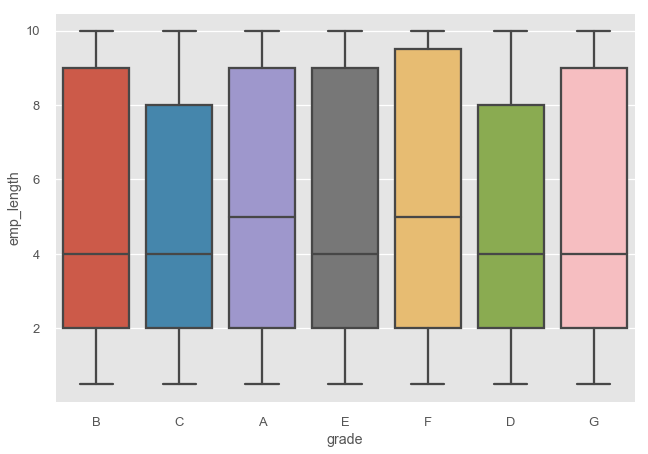

In [424]:
import seaborn as sns
ax = sns.boxplot(x="grade", y="emp_length", data=df2)

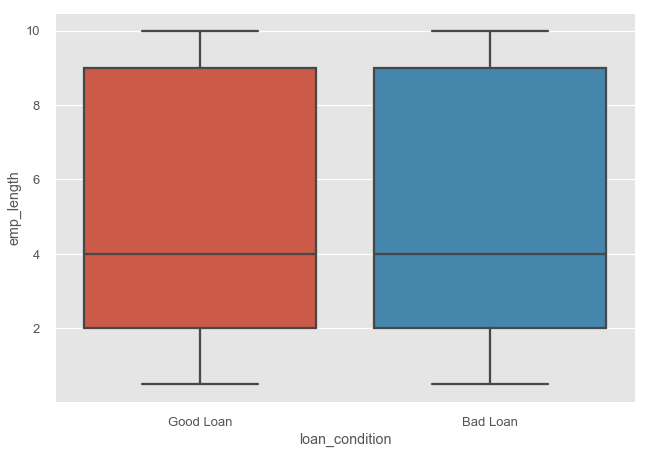

In [425]:
ax = sns.boxplot(x="loan_condition", y="emp_length", data=df2)

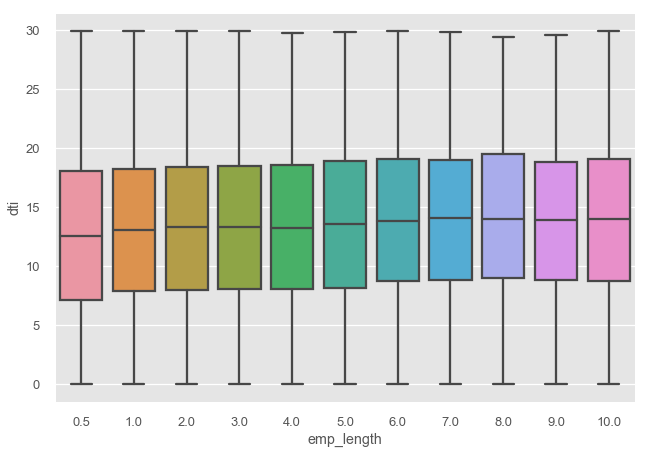

In [426]:
ax = sns.boxplot(x="emp_length", y="dti", data=df2)

## From the above plot, it is observed that, emp_lenght has no effect on loan_condition. So we can impute the value 4. 

In [427]:
df2['emp_length']=df2['emp_length'].fillna(4)

## For revol_util

In [428]:
df2['revol_util'] = df2['revol_util'].map(lambda x: str(x)[:-1])
df2[df2['revol_util']=='na']=np.nan
df2['revol_util']=df2['revol_util'].astype(float)

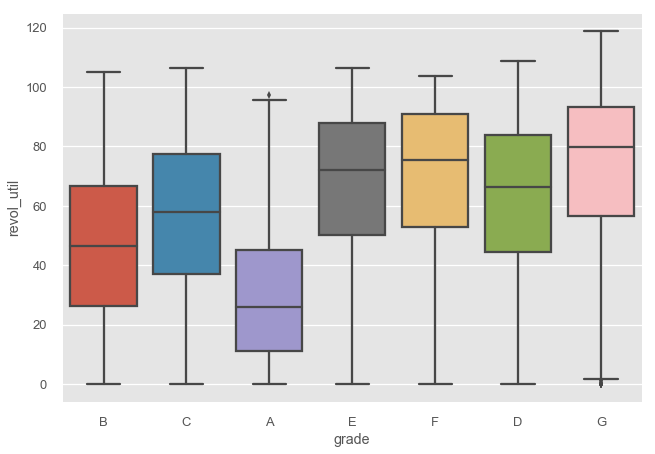

In [429]:
ax = sns.boxplot(x="grade", y="revol_util", data=df2)

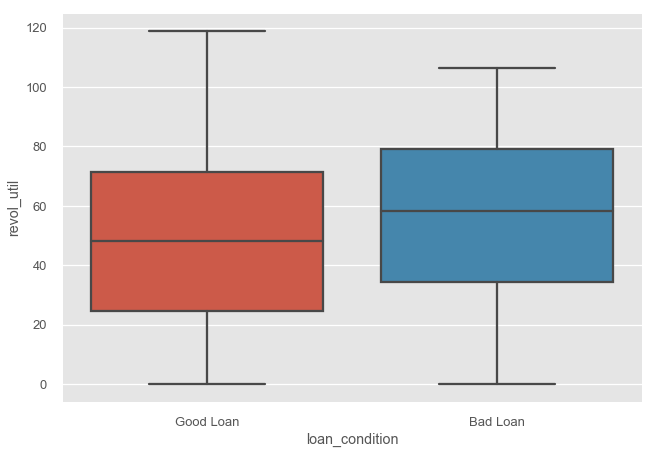

In [430]:
ax = sns.boxplot(x="loan_condition", y="revol_util", data=df2)

## Let us get the mean value for revol_uril for each grade, and we will fill based on that.

In [431]:
df2.groupby(['loan_condition','grade'])['revol_util'].mean()

loan_condition  grade
Bad Loan        A        36.386437
                B        46.729710
                C        55.374216
                D        60.460605
                E        67.014089
                F        70.558689
                G        70.108187
Good Loan       A        29.429886
                B        46.150656
                C        55.945688
                D        62.407984
                E        66.374564
                F        68.364172
                G        72.046450
Name: revol_util, dtype: float64

In [432]:
df2.shape

(42506, 38)

In [433]:
df2['revol_util'] = df2['revol_util'].fillna(df2.groupby(['loan_condition','grade'])['revol_util'].transform('mean'))

In [434]:
for i in df2.columns:
    if df2.isnull().sum()[i]!=0:
        print(i,':',df2.isnull().sum()[i], ':', df2[i].dtype)

loan_amnt : 61 : float64
funded_amnt : 61 : float64
funded_amnt_inv : 61 : float64
term : 61 : object
int_rate : 61 : object
installment : 61 : float64
grade : 61 : object
sub_grade : 61 : object
emp_length : 61 : float64
home_ownership : 61 : object
annual_inc : 61 : float64
verification_status : 61 : object
issue_d : 61 : object
purpose : 61 : object
addr_state : 61 : object
dti : 61 : float64
delinq_2yrs : 61 : float64
earliest_cr_line : 61 : object
inq_last_6mths : 61 : float64
mths_since_last_delinq : 61 : float64
open_acc : 61 : float64
pub_rec : 61 : float64
revol_bal : 61 : float64
revol_util : 61 : float64
total_acc : 61 : float64
total_pymnt : 61 : float64
total_pymnt_inv : 61 : float64
total_rec_prncp : 61 : float64
total_rec_int : 61 : float64
total_rec_late_fee : 61 : float64
recoveries : 61 : float64
collection_recovery_fee : 61 : float64
last_pymnt_d : 140 : object
last_pymnt_amnt : 61 : float64
last_credit_pull_d : 64 : object
pub_rec_bankruptcies : 61 : float64
debt_se

## Looks like 61 rows has null values in many; Drop them

In [435]:
df2=df2.drop(df2[df2['delinq_2yrs'].isnull()].index)

In [436]:
for i in df2.columns:
    if df2.isnull().sum()[i]!=0:
        print(i,':',df2.isnull().sum()[i], ':', df2[i].dtype)

last_pymnt_d : 79 : object
last_credit_pull_d : 3 : object


# Most of the null value have been removed

### We noticed that, many columns contains special characters like %, strings like months; We have to convert to clean them and have to convert them to required format. Time fields are also not in correct format.

In [437]:
df2.head().T

,0,1,2,3,4
loan_amnt,5000,2500,2400,10000,3000
funded_amnt,5000,2500,2400,10000,3000
funded_amnt_inv,4975,2500,2400,10000,3000
term,36 months,60 months,36 months,36 months,60 months
int_rate,10.65%,15.27%,15.96%,13.49%,12.69%
installment,162.87,59.83,84.33,339.31,67.79
grade,B,C,C,C,B
sub_grade,B2,C4,C5,C1,B5
emp_length,10,0.5,10,10,1
home_ownership,RENT,RENT,RENT,RENT,RENT


In [519]:
df4=df2

In [520]:
df4['term']=loan['term']
df4['term'] = df4['term'].map(lambda x: str(x)[:3])
df4['term']=df4['term'].astype(float)

In [521]:
df4['int_rate'] = df4['int_rate'].map(lambda x: str(x)[:-1])
df4['int_rate']=df4['int_rate'].astype(float)

In [522]:
import time
df4['isuue_Date'] = pd.to_datetime(df4.issue_d,format='%b-%Y') 
df4=df4.drop(columns=['issue_d'],axis=1)

In [484]:
df4.shape

(42445, 38)

In [443]:
df4.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,...,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,pub_rec_bankruptcies,debt_settlement_flag,loan_condition,isuue_Date
0,5000.0,5000.0,4975.0,36.0,10.65,162.87,B,B2,10.0,RENT,...,0.00,0.0,0.00,Jan-2015,171.62,May-2019,0.0,N,Good Loan,2011-12-01
1,2500.0,2500.0,2500.0,60.0,15.27,59.83,C,C4,0.5,RENT,...,0.00,122.9,1.11,Apr-2013,119.66,Oct-2016,0.0,N,Bad Loan,2011-12-01
2,2400.0,2400.0,2400.0,36.0,15.96,84.33,C,C5,10.0,RENT,...,0.00,0.0,0.00,Jun-2014,649.91,Jun-2017,0.0,N,Good Loan,2011-12-01
3,10000.0,10000.0,10000.0,36.0,13.49,339.31,C,C1,10.0,RENT,...,16.97,0.0,0.00,Jan-2015,357.48,Apr-2016,0.0,N,Good Loan,2011-12-01
4,3000.0,3000.0,3000.0,60.0,12.69,67.79,B,B5,1.0,RENT,...,0.00,0.0,0.00,Jan-2017,67.30,Apr-2018,0.0,N,Good Loan,2011-12-01


In [444]:
df4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 42445 entries, 0 to 42514
Data columns (total 38 columns):
loan_amnt                  42445 non-null float64
funded_amnt                42445 non-null float64
funded_amnt_inv            42445 non-null float64
term                       42445 non-null float64
int_rate                   42445 non-null float64
installment                42445 non-null float64
grade                      42445 non-null object
sub_grade                  42445 non-null object
emp_length                 42445 non-null float64
home_ownership             42445 non-null object
annual_inc                 42445 non-null float64
verification_status        42445 non-null object
purpose                    42445 non-null object
addr_state                 42445 non-null object
dti                        42445 non-null float64
delinq_2yrs                42445 non-null float64
earliest_cr_line           42445 non-null object
inq_last_6mths             42445 non-null float6

## We have converted most of the columns to required form. Now let us perform EDA

In [369]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import time

# Warnings
import warnings
warnings.filterwarnings('ignore')

sns.set(style='darkgrid')
plt.rcParams["patch.force_edgecolor"] = True

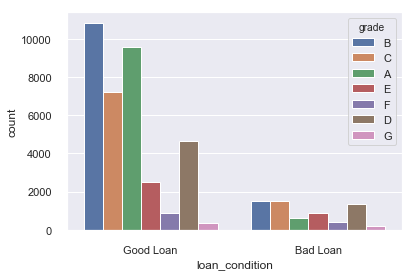

In [370]:
import seaborn as sns
sns.countplot(x='loan_condition', hue='grade',data=df4)

## Let us look at the distribution of inputs

In [371]:
df4.columns

Index(['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate',
       'installment', 'grade', 'sub_grade', 'emp_length', 'home_ownership',
       'annual_inc', 'verification_status', 'purpose', 'addr_state', 'dti',
       'delinq_2yrs', 'earliest_cr_line', 'inq_last_6mths',
       'mths_since_last_delinq', 'open_acc', 'pub_rec', 'revol_bal',
       'revol_util', 'total_acc', 'total_pymnt', 'total_pymnt_inv',
       'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries',
       'collection_recovery_fee', 'last_pymnt_d', 'last_pymnt_amnt',
       'last_credit_pull_d', 'pub_rec_bankruptcies', 'debt_settlement_flag',
       'loan_condition', 'isuue_Date'],
      dtype='object')

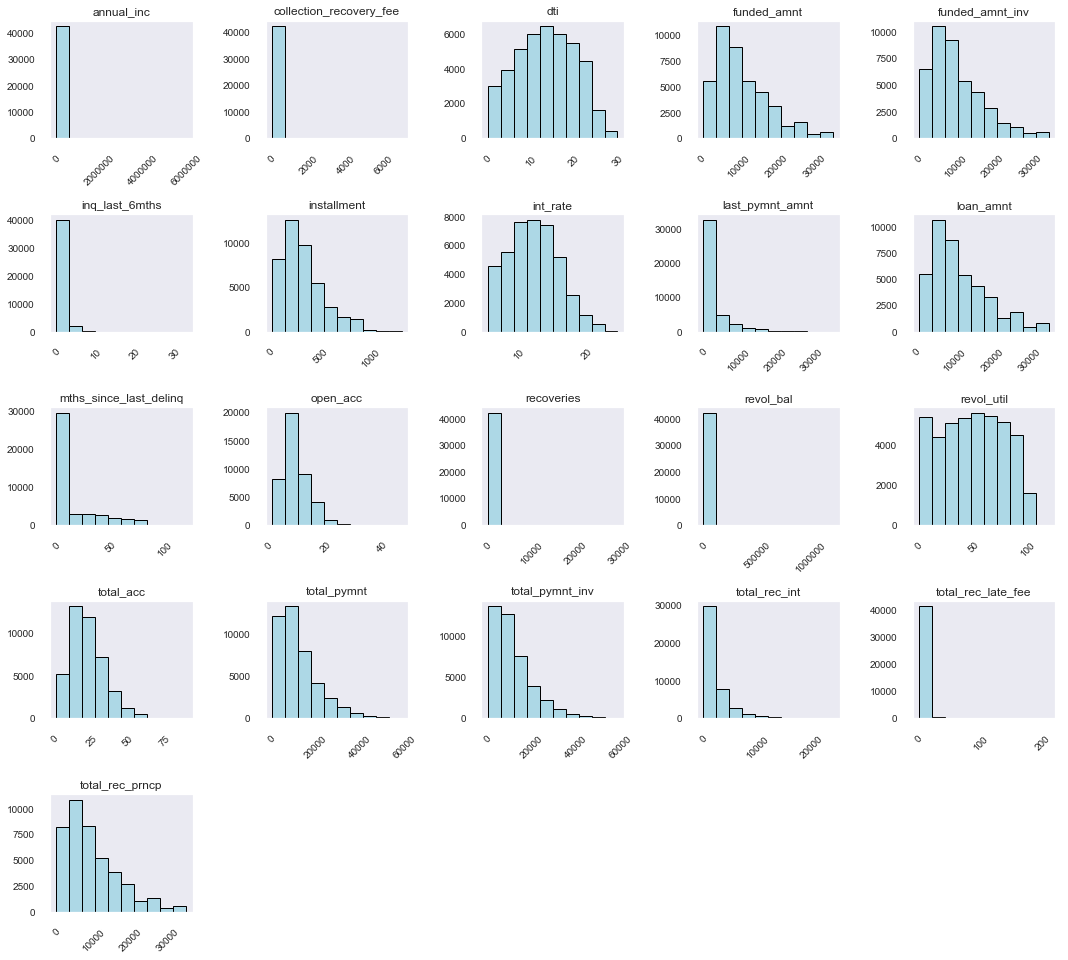

In [372]:

fig = df4[numer1].hist(color='lightblue',
                edgecolor='black', linewidth=1.0,
                xlabelsize=10, ylabelsize=10,
                xrot=45, yrot=0,
                figsize=(10,9),
                grid=False)

plt.tight_layout(rect=(0, 0, 1.5, 1.5)) 

## From the distribution plot we can see that, many of the columns are highly skewed

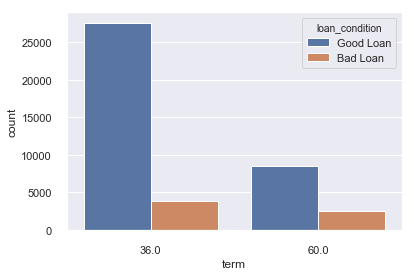

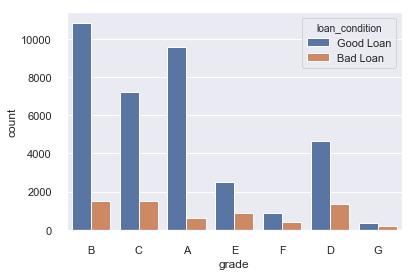

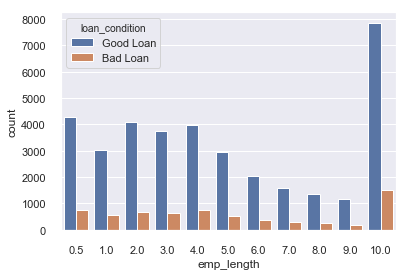

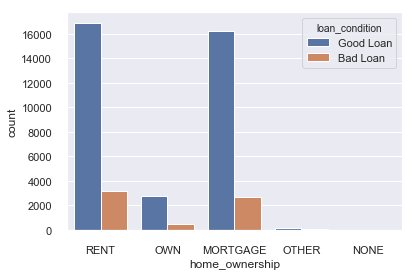

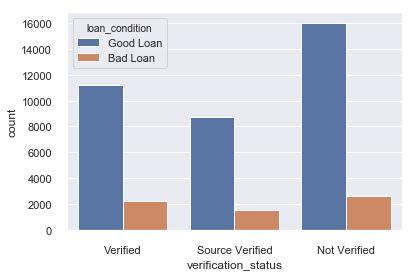

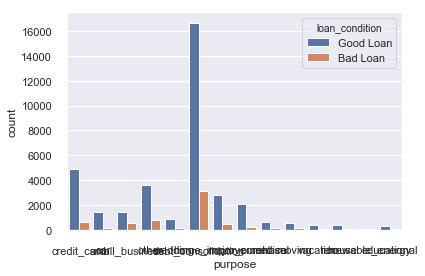

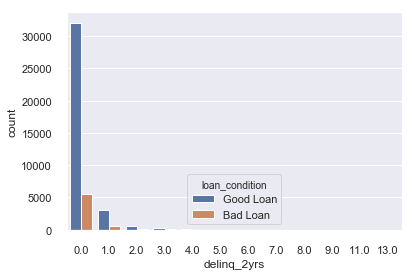

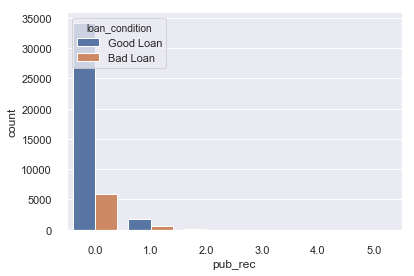

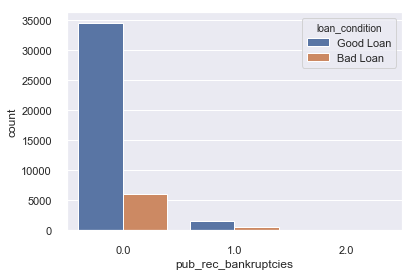

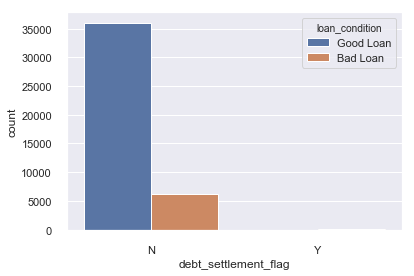

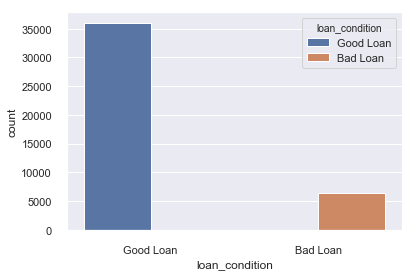

In [373]:
for i in categ1:
    sns.countplot(x=i,hue='loan_condition',data=df4)
    plt.show()

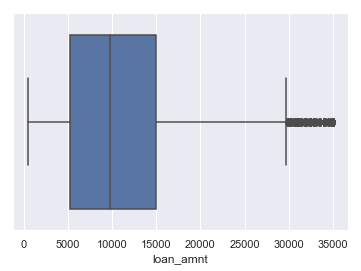

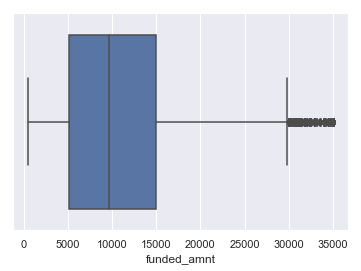

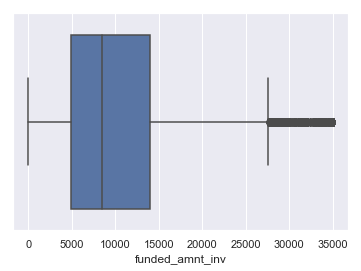

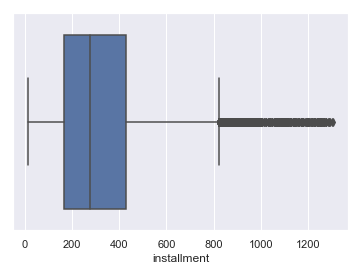

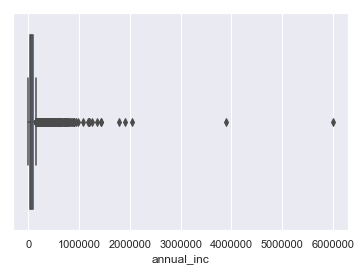

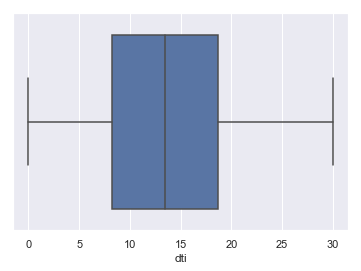

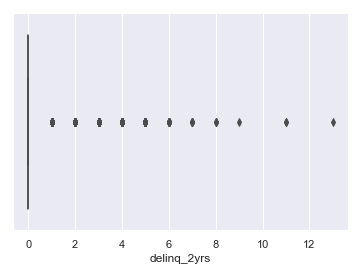

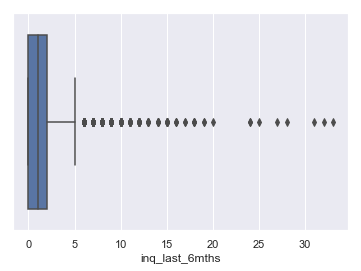

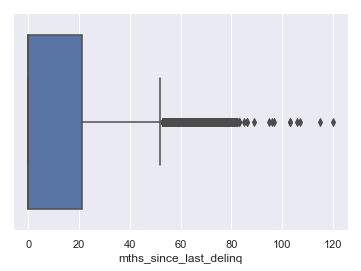

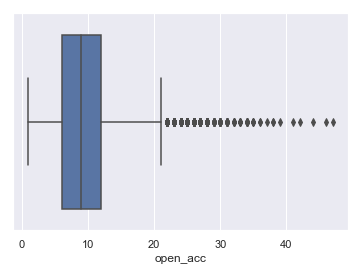

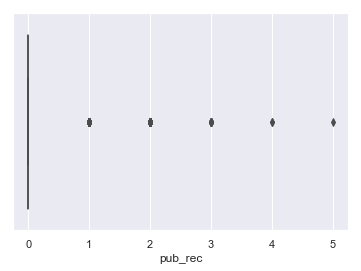

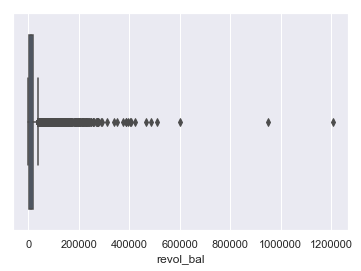

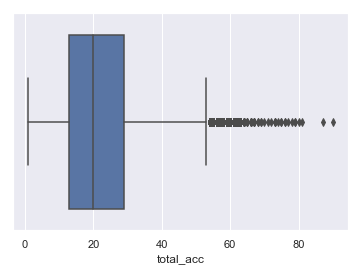

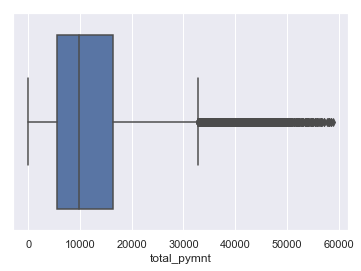

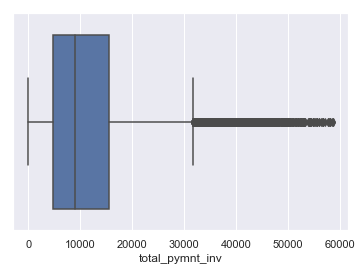

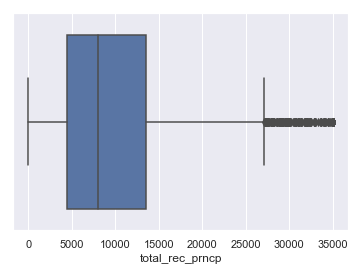

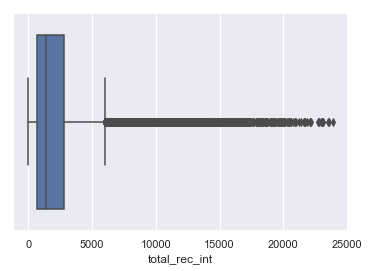

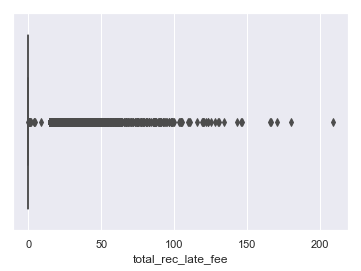

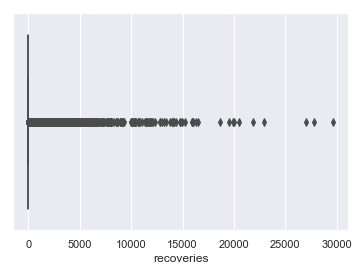

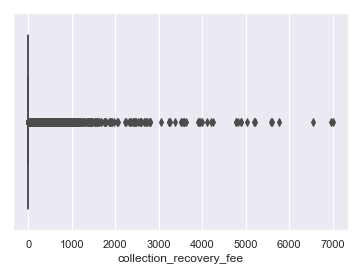

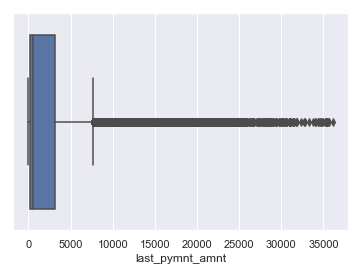

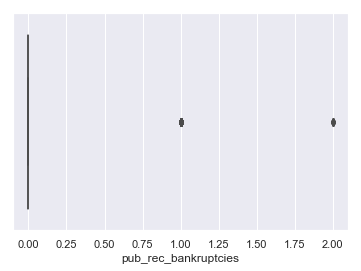

KeyError: 'isuue_Date'

In [121]:
for i in df4:
    if df[i].dtype!='object':        
        sns.boxplot(x=df4[i],hue='loan_condition',data=df4)
        plt.show()


## Data is not normally distributed

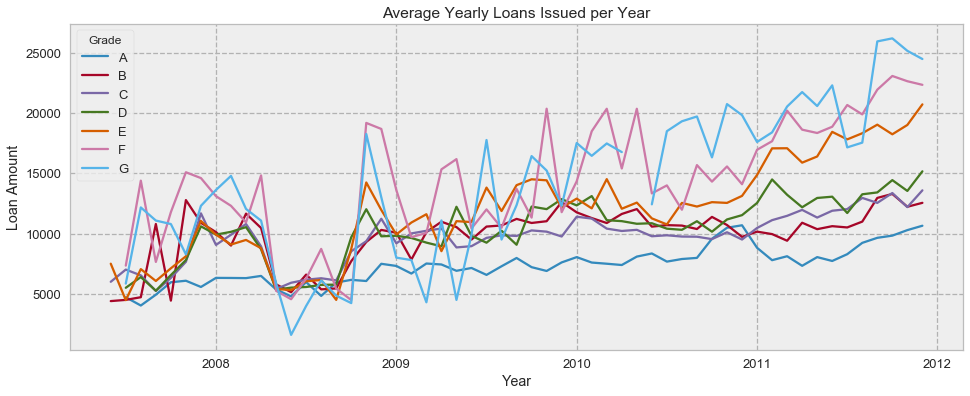

In [374]:
plt.style.use(['bmh','seaborn-talk'])

df4.groupby(['isuue_Date', 'grade']).loan_amnt.mean().unstack().plot(legend=True, figsize=(16, 6))

plt.title('Average Yearly Loans Issued per Year')
plt.xlabel('Year')
plt.ylabel('Loan Amount')
plt.legend(title='Grade', loc='best')

plt.show()

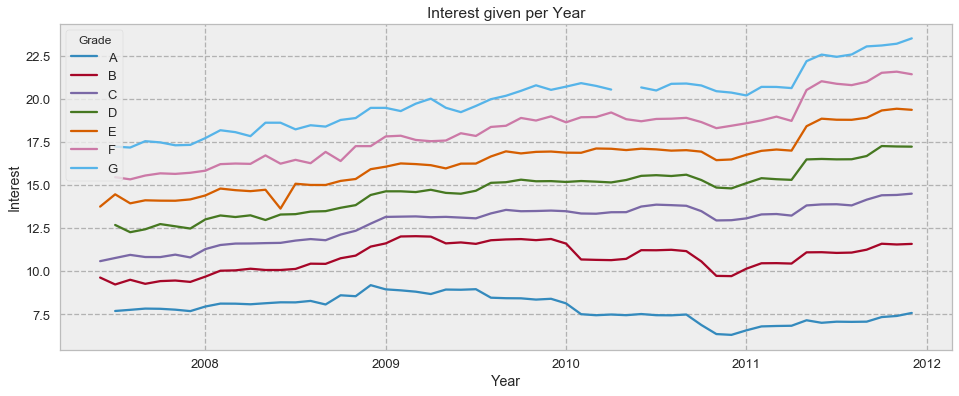

In [375]:
plt.style.use(['bmh','seaborn-talk'])

df4.groupby(['isuue_Date', 'grade']).int_rate.mean().unstack().plot(legend=True, figsize=(16, 6))

plt.title('Interest given per Year')
plt.xlabel('Year')
plt.ylabel('Interest')
plt.legend(title='Grade', loc='best')

plt.show()

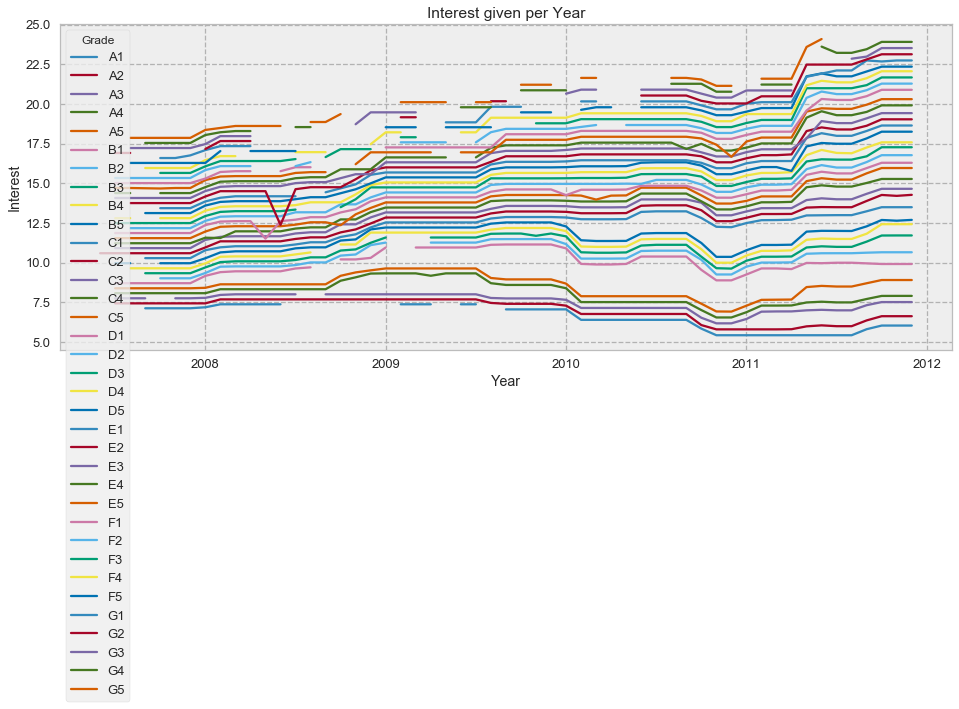

In [376]:
plt.style.use(['bmh','seaborn-talk'])

df4.groupby(['isuue_Date', 'sub_grade']).int_rate.mean().unstack().plot(legend=True, figsize=(16, 6))

plt.title('Interest given per Year')
plt.xlabel('Year')
plt.ylabel('Interest')
plt.legend(title='Grade', loc='best')

plt.show()

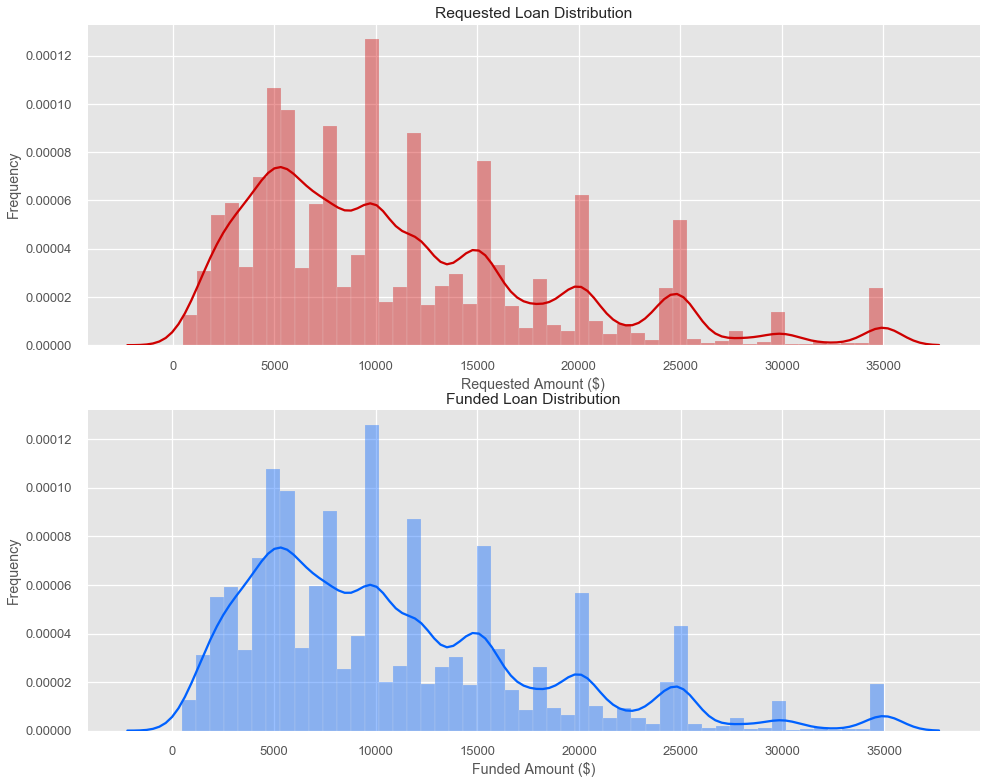

In [377]:
'''
Two subplots to visualize the distribution of both the applied and 
funded loans.                      '''
plt.style.use(['ggplot','seaborn-talk'])


fig, ax = plt.subplots(2,1,figsize=(16,13))

sns.distplot(df4['loan_amnt'], ax=ax[0], color='#ce0000')
ax[0].set_title('Requested Loan Distribution')
ax[0].set_xlabel('Requested Amount ($)')
ax[0].set_ylabel('Frequency')

sns.distplot(df4['funded_amnt'], ax=ax[1], color='#0061ff')
ax[1].set_title('Funded Loan Distribution')
ax[1].set_xlabel('Funded Amount ($)')
ax[1].set_ylabel('Frequency')

plt.show()

In [378]:
# Find the percentage of funded loans

a = df4[df4['loan_amnt'] == df4['funded_amnt']].count()
print('Number of Fully Funded Loans: ', a['loan_amnt'])
print('Number of Requested Loans: ', df4['loan_amnt'].count())
print('Percentage of Fully Funded Loans: ', a['loan_amnt']/df4['loan_amnt'].count())

Number of Fully Funded Loans:  40450
Number of Requested Loans:  42445
Percentage of Fully Funded Loans:  0.9529979974084108


In [379]:
df4['loan_condition'].value_counts()

Good Loan    36036
Bad Loan      6409
Name: loan_condition, dtype: int64

In [380]:
6409/36036*100

17.784992784992784

In [445]:
df4.columns

Index(['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate',
       'installment', 'grade', 'sub_grade', 'emp_length', 'home_ownership',
       'annual_inc', 'verification_status', 'purpose', 'addr_state', 'dti',
       'delinq_2yrs', 'earliest_cr_line', 'inq_last_6mths',
       'mths_since_last_delinq', 'open_acc', 'pub_rec', 'revol_bal',
       'revol_util', 'total_acc', 'total_pymnt', 'total_pymnt_inv',
       'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries',
       'collection_recovery_fee', 'last_pymnt_d', 'last_pymnt_amnt',
       'last_credit_pull_d', 'pub_rec_bankruptcies', 'debt_settlement_flag',
       'loan_condition', 'isuue_Date'],
      dtype='object')

In [523]:
df4=df4.drop(columns=['isuue_Date','earliest_cr_line','last_pymnt_d','last_credit_pull_d'],axis=1)
df4.shape

(42445, 34)

In [524]:
df4=df4.drop(columns=['addr_state'],axis=1)
df4.shape

(42445, 33)

# Replaced Good loan with 0 and Bad loan with 1

In [525]:
df4['loan_condition']=df4['loan_condition'].replace(['Good Loan','Bad Loan'], [0,1])

## Seperate out numerical and categorical columns

In [526]:
categ1=[]
numer1=[]
for i in df4.columns:
    if(len(df4[i].unique())<15):
        categ1.append(i)
    else:
        numer1.append(i)
        
print (len(categ1))        
print ('Categorical columns are: \n', categ1)

print('')
print('Continuous data are: \n', numer1)
print (len(numer1)) 

11
Categorical columns are: 
 ['term', 'grade', 'emp_length', 'home_ownership', 'verification_status', 'purpose', 'delinq_2yrs', 'pub_rec', 'pub_rec_bankruptcies', 'debt_settlement_flag', 'loan_condition']

Continuous data are: 
 ['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'int_rate', 'installment', 'sub_grade', 'annual_inc', 'dti', 'inq_last_6mths', 'mths_since_last_delinq', 'open_acc', 'revol_bal', 'revol_util', 'total_acc', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries', 'collection_recovery_fee', 'last_pymnt_amnt']
22


In [489]:
for i in categ1:
    print(i,df4[i].nunique())

term 2
grade 7
emp_length 11
home_ownership 5
verification_status 3
purpose 14
delinq_2yrs 12
pub_rec 6
pub_rec_bankruptcies 3
debt_settlement_flag 2
loan_condition 2


In [490]:
for i in numer1:
    print(i,df4[i].nunique())

loan_amnt 898
funded_amnt 1051
funded_amnt_inv 9234
int_rate 167
installment 16423
sub_grade 35
annual_inc 5588
dti 2894
inq_last_6mths 28
mths_since_last_delinq 95
open_acc 44
revol_bal 22708
revol_util 1119
total_acc 83
total_pymnt 42276
total_pymnt_inv 40025
total_rec_prncp 7673
total_rec_int 37388
total_rec_late_fee 2287
recoveries 5044
collection_recovery_fee 2890
last_pymnt_amnt 37212


## Dealing with numerical columns

In [491]:
## To see if a column/feature has any contribution in predicting

In [492]:
df5=df4[numer1]
    
for i in df5.columns:
    if df5[i].dtype=='float64':
        
    
        mod = ols('loan_condition~df4[i]', data = df4).fit() 
        aov_table = sm.stats.anova_lm(mod, typ=2)
        print(aov_table)

               sum_sq       df          F        PR(>F)
df4[i]      10.097024      1.0  78.905227  6.765554e-19
Residual  5431.173421  42443.0        NaN           NaN
               sum_sq       df          F        PR(>F)
df4[i]       8.739741      1.0  68.281401  1.458106e-16
Residual  5432.530704  42443.0        NaN           NaN
               sum_sq       df         F    PR(>F)
df4[i]       0.586923      1.0  4.578612  0.032379
Residual  5440.683521  42443.0       NaN       NaN
               sum_sq       df            F  PR(>F)
df4[i]     217.186124      1.0  1764.525629     0.0
Residual  5224.084320  42443.0          NaN     NaN
               sum_sq       df          F    PR(>F)
df4[i]       2.516487      1.0  19.638186  0.000009
Residual  5438.753957  42443.0        NaN       NaN
               sum_sq       df          F        PR(>F)
df4[i]       7.618531      1.0  59.509392  1.243614e-14
Residual  5433.651913  42443.0        NaN           NaN
               sum_sq       df 

## Check for multicolinearity

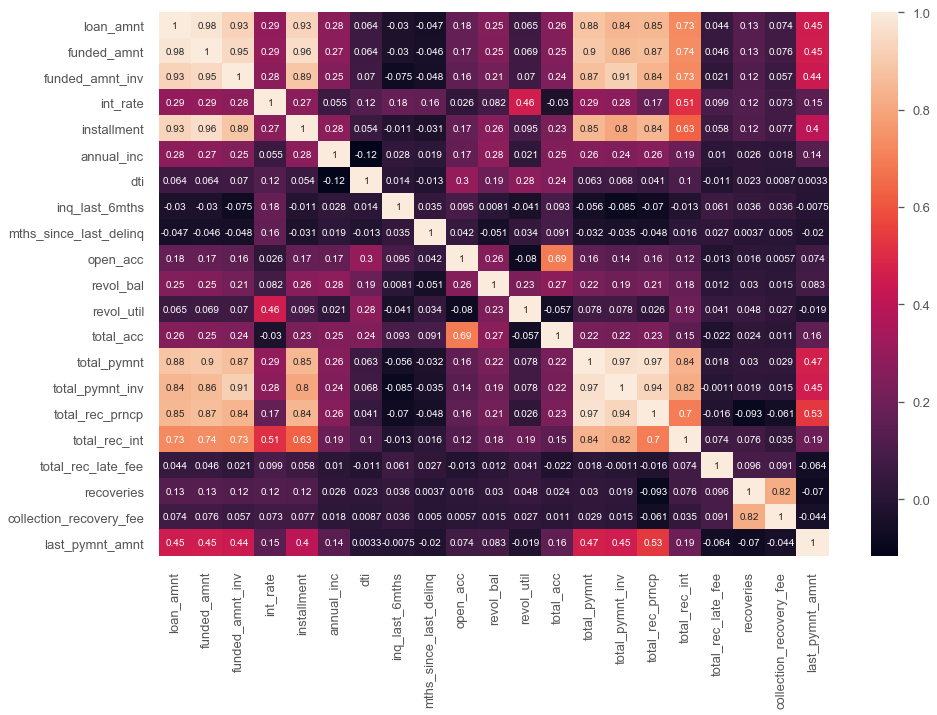

In [493]:
import matplotlib.pyplot as plt 
import seaborn as sns
plt.figure(figsize=(15,10))
sns.heatmap(df4[numer1].corr(), annot=True)  #To get the correlation between all the variables

In [528]:
def multi_collinearity(X):
    from statsmodels.stats.outliers_influence import variance_inflation_factor
    vif=[variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    VIF=pd.DataFrame()
    VIF['columns']=X.columns
    VIF['vif']=vif
    return(VIF)

In [529]:
a=['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'installment',
       'annual_inc','dti', 'inq_last_6mths',
       'mths_since_last_delinq', 'open_acc', 'revol_bal',
       'revol_util', 'total_acc', 'total_pymnt', 'total_pymnt_inv',
       'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries',
       'collection_recovery_fee', 'last_pymnt_amnt']

In [530]:
df6=df4[a]
df6.shape

(42445, 20)

In [531]:

l=[]
print (df6.shape)
for i in df6.columns:
    m=multi_collinearity(df6).sort_values(['vif'],ascending=False)
    c=m.iloc[0,0]
    if m.iloc[0,1]>8:
        l.append(c)
        df6=df6.drop([c],axis=1)
        print(len(df6.columns),c,df6.shape,m.iloc[0,1])    
        
print(l)

(42445, 20)
19 total_pymnt (42445, 19) 31940422889152.453
18 funded_amnt (42445, 18) 389.08771573448047
17 total_pymnt_inv (42445, 17) 153.7314023075114
16 loan_amnt (42445, 16) 45.773576559113664
15 installment (42445, 15) 23.370103495706775
14 total_rec_prncp (42445, 14) 14.392743722844545
13 open_acc (42445, 13) 10.113392558165524
['total_pymnt', 'funded_amnt', 'total_pymnt_inv', 'loan_amnt', 'installment', 'total_rec_prncp', 'open_acc']


In [532]:
print(df4.shape)
df4=df4.drop(columns=l,axis=1)
df4.shape

(42445, 33)


(42445, 26)

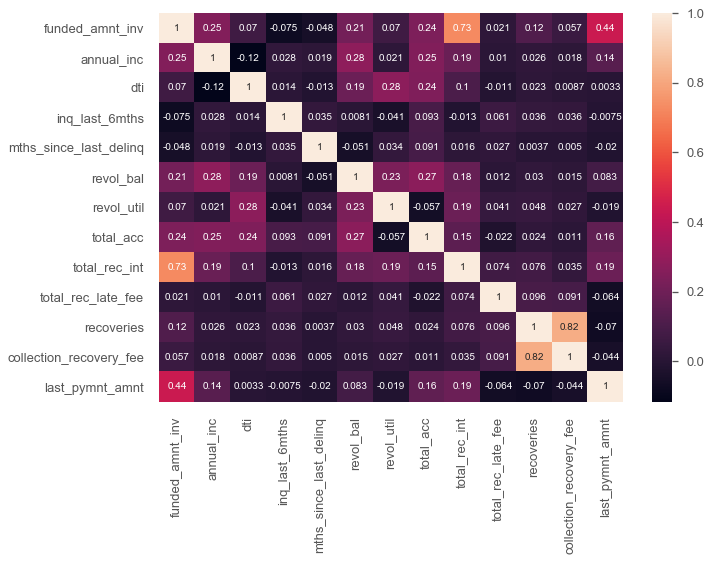

In [499]:
sns.heatmap(df6.corr(), annot=True) 

In [500]:
import statsmodels.api         as     sm
from   statsmodels.formula.api import ols

In [466]:
for i in df6.columns:
    
    mod = ols('loan_condition~df6[i]', data = df4).fit() 
    aov_table = sm.stats.anova_lm(mod, typ=2)
    print(aov_table)

               sum_sq       df         F    PR(>F)
df6[i]       0.586923      1.0  4.578612  0.032379
Residual  5440.683521  42443.0       NaN       NaN
               sum_sq       df          F        PR(>F)
df6[i]       7.618531      1.0  59.509392  1.243614e-14
Residual  5433.651913  42443.0        NaN           NaN
               sum_sq       df          F        PR(>F)
df6[i]       9.652616      1.0  75.426139  3.925926e-18
Residual  5431.617829  42443.0        NaN           NaN
               sum_sq       df           F         PR(>F)
df6[i]      67.106052      1.0  529.976748  1.483482e-116
Residual  5374.164392  42443.0         NaN            NaN
               sum_sq       df          F    PR(>F)
df6[i]       2.676697      1.0  20.889045  0.000005
Residual  5438.593748  42443.0        NaN       NaN
               sum_sq       df          F    PR(>F)
df6[i]       1.717584      1.0  13.401728  0.000252
Residual  5439.552860  42443.0        NaN       NaN
               sum_sq    

In [501]:
categ1

['term',
 'grade',
 'emp_length',
 'home_ownership',
 'verification_status',
 'purpose',
 'delinq_2yrs',
 'pub_rec',
 'pub_rec_bankruptcies',
 'debt_settlement_flag',
 'loan_condition']

In [502]:
df4[categ1].head(2)

,term,grade,emp_length,home_ownership,verification_status,purpose,delinq_2yrs,pub_rec,pub_rec_bankruptcies,debt_settlement_flag,loan_condition
0,36.0,B,10.0,RENT,Verified,credit_card,0.0,0.0,0.0,N,0
1,60.0,C,0.5,RENT,Source Verified,car,0.0,0.0,0.0,N,1


In [503]:
for i in categ1:
    print(i,df4[i].nunique())

term 2
grade 7
emp_length 11
home_ownership 5
verification_status 3
purpose 14
delinq_2yrs 12
pub_rec 6
pub_rec_bankruptcies 3
debt_settlement_flag 2
loan_condition 2


In [527]:
df4.shape

(42445, 33)

In [505]:
df4=pd.get_dummies(df4, columns=['term','verification_status','pub_rec_bankruptcies','debt_settlement_flag'])

In [506]:
df4.shape

(42445, 32)

In [507]:
df4[['grade','sub_grade','purpose','delinq_2yrs','pub_rec','home_ownership']] = pd.Categorical(df4[['grade','sub_grade','purpose','delinq_2yrs','pub_rec','home_ownership']]).codes 

In [537]:
df4[['grade','sub_grade','purpose','delinq_2yrs','pub_rec','home_ownership','term','verification_status','pub_rec_bankruptcies','debt_settlement_flag']] = pd.Categorical(df4[['grade','sub_grade','purpose','delinq_2yrs','pub_rec','home_ownership','term','verification_status','pub_rec_bankruptcies','debt_settlement_flag']]).codes 

In [508]:
df4.shape

(42445, 32)

In [509]:
df4.head(2)

,funded_amnt_inv,int_rate,grade,sub_grade,emp_length,home_ownership,annual_inc,purpose,dti,delinq_2yrs,...,term_36.0,term_60.0,verification_status_Not Verified,verification_status_Source Verified,verification_status_Verified,pub_rec_bankruptcies_0.0,pub_rec_bankruptcies_1.0,pub_rec_bankruptcies_2.0,debt_settlement_flag_N,debt_settlement_flag_Y
0,4975.0,10.6,1,5,10.0,2,24000.0,4,27.65,0,...,1,0,0,0,1,1,0,0,1,0
1,2500.0,15.2,1,5,0.5,2,30000.0,4,1.00,0,...,0,1,0,1,0,1,0,0,1,0


In [511]:
df4.columns

Index(['funded_amnt_inv', 'int_rate', 'grade', 'sub_grade', 'emp_length',
       'home_ownership', 'annual_inc', 'purpose', 'dti', 'delinq_2yrs',
       'inq_last_6mths', 'mths_since_last_delinq', 'pub_rec', 'revol_bal',
       'revol_util', 'total_acc', 'total_rec_int', 'total_rec_late_fee',
       'recoveries', 'collection_recovery_fee', 'last_pymnt_amnt',
       'loan_condition', 'term_36.0', 'term_60.0',
       'verification_status_Not Verified',
       'verification_status_Source Verified', 'verification_status_Verified',
       'pub_rec_bankruptcies_0.0', 'pub_rec_bankruptcies_1.0',
       'pub_rec_bankruptcies_2.0', 'debt_settlement_flag_N',
       'debt_settlement_flag_Y'],
      dtype='object')

In [512]:
categ2=[]
numer2=[]
for i in df4.columns:
    if(len(df4[i].unique())<15):
        categ2.append(i)
    else:
        numer2.append(i)
        
print (len(categ2))        
print ('Categorical columns are: \n', categ2)

print('')
print('Continuous data are: \n', numer2)
print (len(numer2)) 

18
Categorical columns are: 
 ['grade', 'sub_grade', 'emp_length', 'home_ownership', 'purpose', 'delinq_2yrs', 'pub_rec', 'loan_condition', 'term_36.0', 'term_60.0', 'verification_status_Not Verified', 'verification_status_Source Verified', 'verification_status_Verified', 'pub_rec_bankruptcies_0.0', 'pub_rec_bankruptcies_1.0', 'pub_rec_bankruptcies_2.0', 'debt_settlement_flag_N', 'debt_settlement_flag_Y']

Continuous data are: 
 ['funded_amnt_inv', 'int_rate', 'annual_inc', 'dti', 'inq_last_6mths', 'mths_since_last_delinq', 'revol_bal', 'revol_util', 'total_acc', 'total_rec_int', 'total_rec_late_fee', 'recoveries', 'collection_recovery_fee', 'last_pymnt_amnt']
14


In [534]:
df4[categ1].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 42445 entries, 0 to 42514
Data columns (total 11 columns):
term                    42445 non-null float64
grade                   42445 non-null object
emp_length              42445 non-null float64
home_ownership          42445 non-null object
verification_status     42445 non-null object
purpose                 42445 non-null object
delinq_2yrs             42445 non-null float64
pub_rec                 42445 non-null float64
pub_rec_bankruptcies    42445 non-null float64
debt_settlement_flag    42445 non-null object
loan_condition          42445 non-null int64
dtypes: float64(5), int64(1), object(5)
memory usage: 3.9+ MB


In [513]:
import scipy.stats as stats
import scipy

In [539]:
df4[categ1].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 42445 entries, 0 to 42514
Data columns (total 11 columns):
term                    42445 non-null int8
grade                   42445 non-null int8
emp_length              42445 non-null float64
home_ownership          42445 non-null int8
verification_status     42445 non-null int8
purpose                 42445 non-null int8
delinq_2yrs             42445 non-null int8
pub_rec                 42445 non-null int8
pub_rec_bankruptcies    42445 non-null int8
debt_settlement_flag    42445 non-null int8
loan_condition          42445 non-null int64
dtypes: float64(1), int64(1), int8(9)
memory usage: 1.3 MB


In [538]:
for i in categ1:
    d5=df4[i]
    d6=df4['loan_condition']
    chi_square_stat, p_value = stats.chisquare(d5, f_exp=d6)

    print(i,'At 5 %s level of significance, the p-value is %1.7f' %('%', p_value))  
    #probability of rejecting null is even less
#so this is better classification than the before

term At 5 % level of significance, the p-value is 0.0000000
grade At 5 % level of significance, the p-value is 0.0000000
emp_length At 5 % level of significance, the p-value is 0.0000000
home_ownership At 5 % level of significance, the p-value is 0.0000000
verification_status At 5 % level of significance, the p-value is 0.0000000
purpose At 5 % level of significance, the p-value is 0.0000000
delinq_2yrs At 5 % level of significance, the p-value is 0.0000000
pub_rec At 5 % level of significance, the p-value is 0.0000000
pub_rec_bankruptcies At 5 % level of significance, the p-value is 0.0000000
debt_settlement_flag At 5 % level of significance, the p-value is nan
loan_condition At 5 % level of significance, the p-value is nan


# Some more EDA

In [291]:
z1=pd.crosstab(df4['loan_condition'], df4['grade']).style.background_gradient(cmap = sns.light_palette("blue", as_cmap=True))
z1

grade,A,B,C,D,E,F,G
loan_condition,,,,,,,
0,9562,10859,7220,4673,2502,882,338
1,609,1517,1499,1323,878,412,171


In [294]:
z1=pd.crosstab(df4['loan_condition'], df4['grade'])
z1

grade,A,B,C,D,E,F,G
loan_condition,,,,,,,
0,9562,10859,7220,4673,2502,882,338
1,609,1517,1499,1323,878,412,171


In [295]:
pd.crosstab(df4['loan_condition'], df4['grade']).style.background_gradient(cmap = sns.light_palette("blue", as_cmap=True))

grade,A,B,C,D,E,F,G
loan_condition,,,,,,,
0,9562,10859,7220,4673,2502,882,338
1,609,1517,1499,1323,878,412,171


In [296]:
z1.iloc[0]=z1.iloc[0]/6428 *100

In [297]:
z1

grade,A,B,C,D,E,F,G
loan_condition,,,,,,,
0,148.755445,168.932794,112.321095,72.697573,38.92346,13.72122,5.258245
1,609.000000,1517.000000,1499.000000,1323.000000,878.00000,412.00000,171.000000


In [298]:
z1.iloc[1]=z1.iloc[1]/36078 *100
z1

grade,A,B,C,D,E,F,G
loan_condition,,,,,,,
0,148.755445,168.932794,112.321095,72.697573,38.923460,13.72122,5.258245
1,1.688009,4.204779,4.154887,3.667055,2.433616,1.14197,0.473973


In [299]:
z1=z1/42538 *100
z1

grade,A,B,C,D,E,F,G
loan_condition,,,,,,,
0,0.349700,0.397134,0.264049,0.170900,0.091503,0.032256,0.012361
1,0.003968,0.009885,0.009767,0.008621,0.005721,0.002685,0.001114


In [301]:
pd.crosstab(df4['loan_condition'], df4['home_ownership']).style.background_gradient(cmap = sns.light_palette("blue", as_cmap=True))
    

home_ownership,MORTGAGE,NONE,OTHER,OWN,RENT
loan_condition,,,,,
0,16246,3,105,2750,16932
1,2692,1,29,493,3194


In [302]:
pd.crosstab(df4['loan_condition'], df4['term']).style.background_gradient(cmap = sns.light_palette("blue", as_cmap=True))
    

term,36.0,60.0
loan_condition,,
0,27591,8445
1,3857,2552


In [303]:
z2=pd.crosstab(df4['loan_condition'], df4['term'])
z2=z2/42538 *100
z2

term,36.0,60.0
loan_condition,,
0,64.862006,19.852837
1,9.067187,5.999342


In [304]:
z2=pd.crosstab(df4['loan_condition'], df4['emp_length'])
z2=z2/42538 *100
z2

emp_length,0.5,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0
loan_condition,,,,,,,,,,,
0,10.070995,7.139499,9.598477,8.766280,9.370445,6.925572,4.751046,3.707273,3.178335,2.724623,18.482298
1,1.751375,1.285909,1.535098,1.478678,1.793690,1.191875,0.822794,0.693498,0.557149,0.423151,3.533311


In [305]:
print(1.7/11.7,1.29/8.3,1.53/11,1.4/10,1.22/8.5,1.19/8,0.82/5.5,0.69/4.4,0.55/3.6,0.4/3.1,3.53/22)

0.1452991452991453 0.15542168674698795 0.1390909090909091 0.13999999999999999 0.14352941176470588 0.14875 0.14909090909090908 0.1568181818181818 0.1527777777777778 0.12903225806451613 0.16045454545454543


In [306]:
z2=pd.crosstab(df4['loan_condition'], df4['pub_rec_bankruptcies'])
z2

pub_rec_bankruptcies,0.0,1.0,2.0
loan_condition,,,
0,34621,1409,6
1,5971,436,2


In [307]:
z2=pd.crosstab(df4['loan_condition'], df4['pub_rec_bankruptcies'])
z2=z2/42538 *100
z2

pub_rec_bankruptcies,0.0,1.0,2.0
loan_condition,,,
0,81.388406,3.312333,0.014105
1,14.036861,1.024966,0.004702


In [309]:
pd.crosstab(df4['loan_condition'], df4['verification_status']).style.background_gradient(cmap = sns.light_palette("blue", as_cmap=True))
    

verification_status,Not Verified,Source Verified,Verified
loan_condition,,,
0,16049,8763,11224
1,2642,1531,2236


In [310]:
z3=pd.crosstab(df4['loan_condition'], df4['verification_status'])
z3=z3/42538 *100
z3

verification_status,Not Verified,Source Verified,Verified
loan_condition,,,
0,37.728619,20.600404,26.385820
1,6.210917,3.599135,5.256477


In [311]:
pd.crosstab(df4['loan_condition'], df4['purpose']).style.background_gradient(cmap = sns.light_palette("blue", as_cmap=True))
    

purpose,car,credit_card,debt_consolidation,educational,home_improvement,house,major_purchase,medical,moving,other,renewable_energy,small_business,vacation,wedding
loan_condition,,,,,,,,,,,,,,
0,1439,4858,16681,331,2775,356,2060,624,520,3632,86,1440,340,894
1,172,616,3078,88,419,69,244,127,106,751,20,551,59,109


In [312]:
z3=pd.crosstab(df4['loan_condition'], df4['purpose'])
z3=z3/42538 *100
z3

purpose,car,credit_card,debt_consolidation,educational,home_improvement,house,major_purchase,medical,moving,other,renewable_energy,small_business,vacation,wedding
loan_condition,,,,,,,,,,,,,,
0,3.382858,11.420377,39.214350,0.778128,6.523579,0.836899,4.842729,1.466924,1.222436,8.538248,0.202172,3.385209,0.799285,2.101650
1,0.404344,1.448117,7.235883,0.206874,0.985002,0.162208,0.573605,0.298557,0.249189,1.765480,0.047017,1.295312,0.138700,0.256241


In [313]:
pd.crosstab(df4['loan_condition'], df4['debt_settlement_flag']).style.background_gradient(cmap = sns.light_palette("blue", as_cmap=True))
    

debt_settlement_flag,N,Y
loan_condition,,
0,36036,0
1,6249,160


In [314]:
z3=pd.crosstab(df4['loan_condition'], df4['debt_settlement_flag'])
z3=z3/42538 *100
z3

debt_settlement_flag,N,Y
loan_condition,,
0,84.714843,0.000000
1,14.690394,0.376134


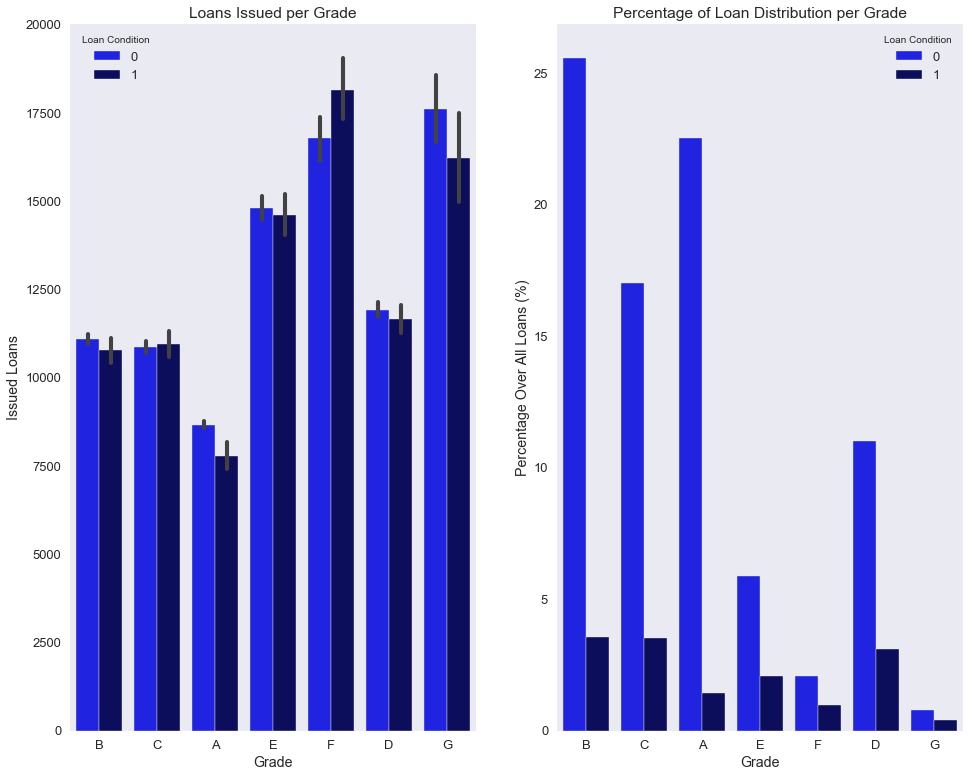

In [316]:
import matplotlib.pyplot as plt

plt.style.use(['seaborn-dark','seaborn-talk'])
palette = ["#0004ff","#000168"]

fig, ax = plt.subplots(1,2,figsize=(16,13))

sns.barplot(x='grade', y='loan_amnt', hue='loan_condition', data=df4, ax=ax[0], palette=palette)
ax[0].set_xlabel('Grade')
ax[0].set_ylabel('Issued Loans')
ax[0].set_title('Loans Issued per Grade')
ax[0].legend(title='Loan Condition')


sns.barplot(x='grade', y='loan_amnt', hue='loan_condition', data=df4, ax=ax[1], palette=palette,
            estimator = lambda x: len(x) / len(df4) * 100)
ax[1].set_xlabel('Grade')
ax[1].set_ylabel('Percentage Over All Loans (%)')
ax[1].set_title('Percentage of Loan Distribution per Grade')
ax[1].legend(title='Loan Condition')

plt.show()